# importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading and understanding data

In [4]:
df_train = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\XGBM & LGBM\\Titanic_train.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# feature engneering, data preprocessing and data imputation

In [10]:
df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [11]:
from sklearn.impute import KNNImputer

In [12]:
impute = KNNImputer(n_neighbors = 5)

In [13]:
df_train[['Age']] = impute.fit_transform(df_train[['Age']])

In [14]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [15]:
df_train = df_train.dropna()

In [16]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb = LabelEncoder()

In [19]:
df_train.iloc[:, -1]= lb.fit_transform(df_train.iloc[:, -1]).astype(str)

In [20]:
df_train.iloc[:, -6]= lb.fit_transform(df_train.iloc[:, -6]).astype(str)

In [21]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


<Axes: ylabel='Fare'>

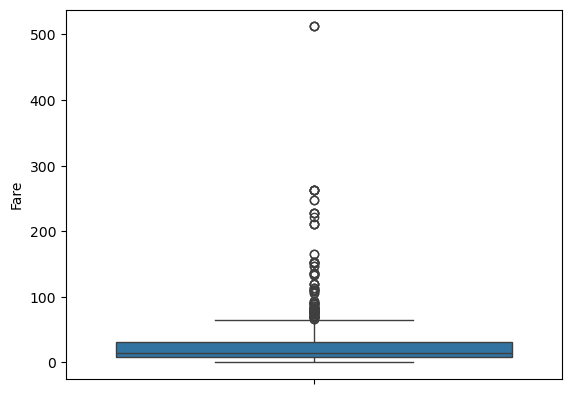

In [22]:
sns.boxplot(df_train['Fare'])

In [23]:
df_train.iloc[:, -2] = df_train.iloc[:, -2].apply(lambda x: 7.895800 if x < 7.895800 else 31.00 if x > 31.00 else x)

<Axes: ylabel='Fare'>

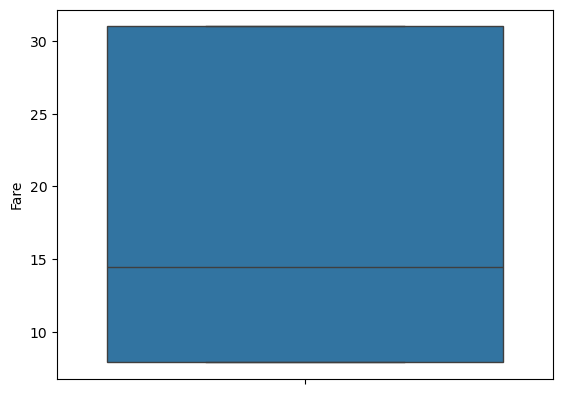

In [24]:
sns.boxplot(df_train['Fare'])

# Data visualization

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

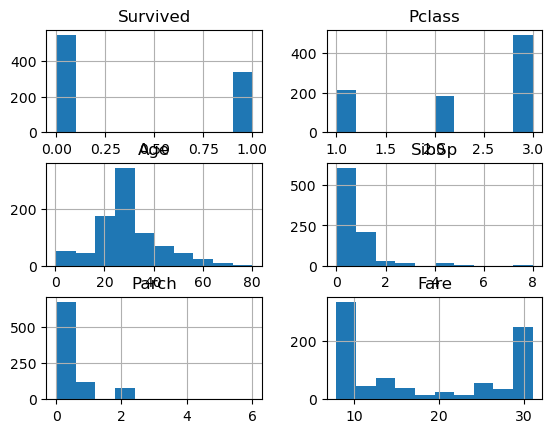

In [26]:
df_train.hist()

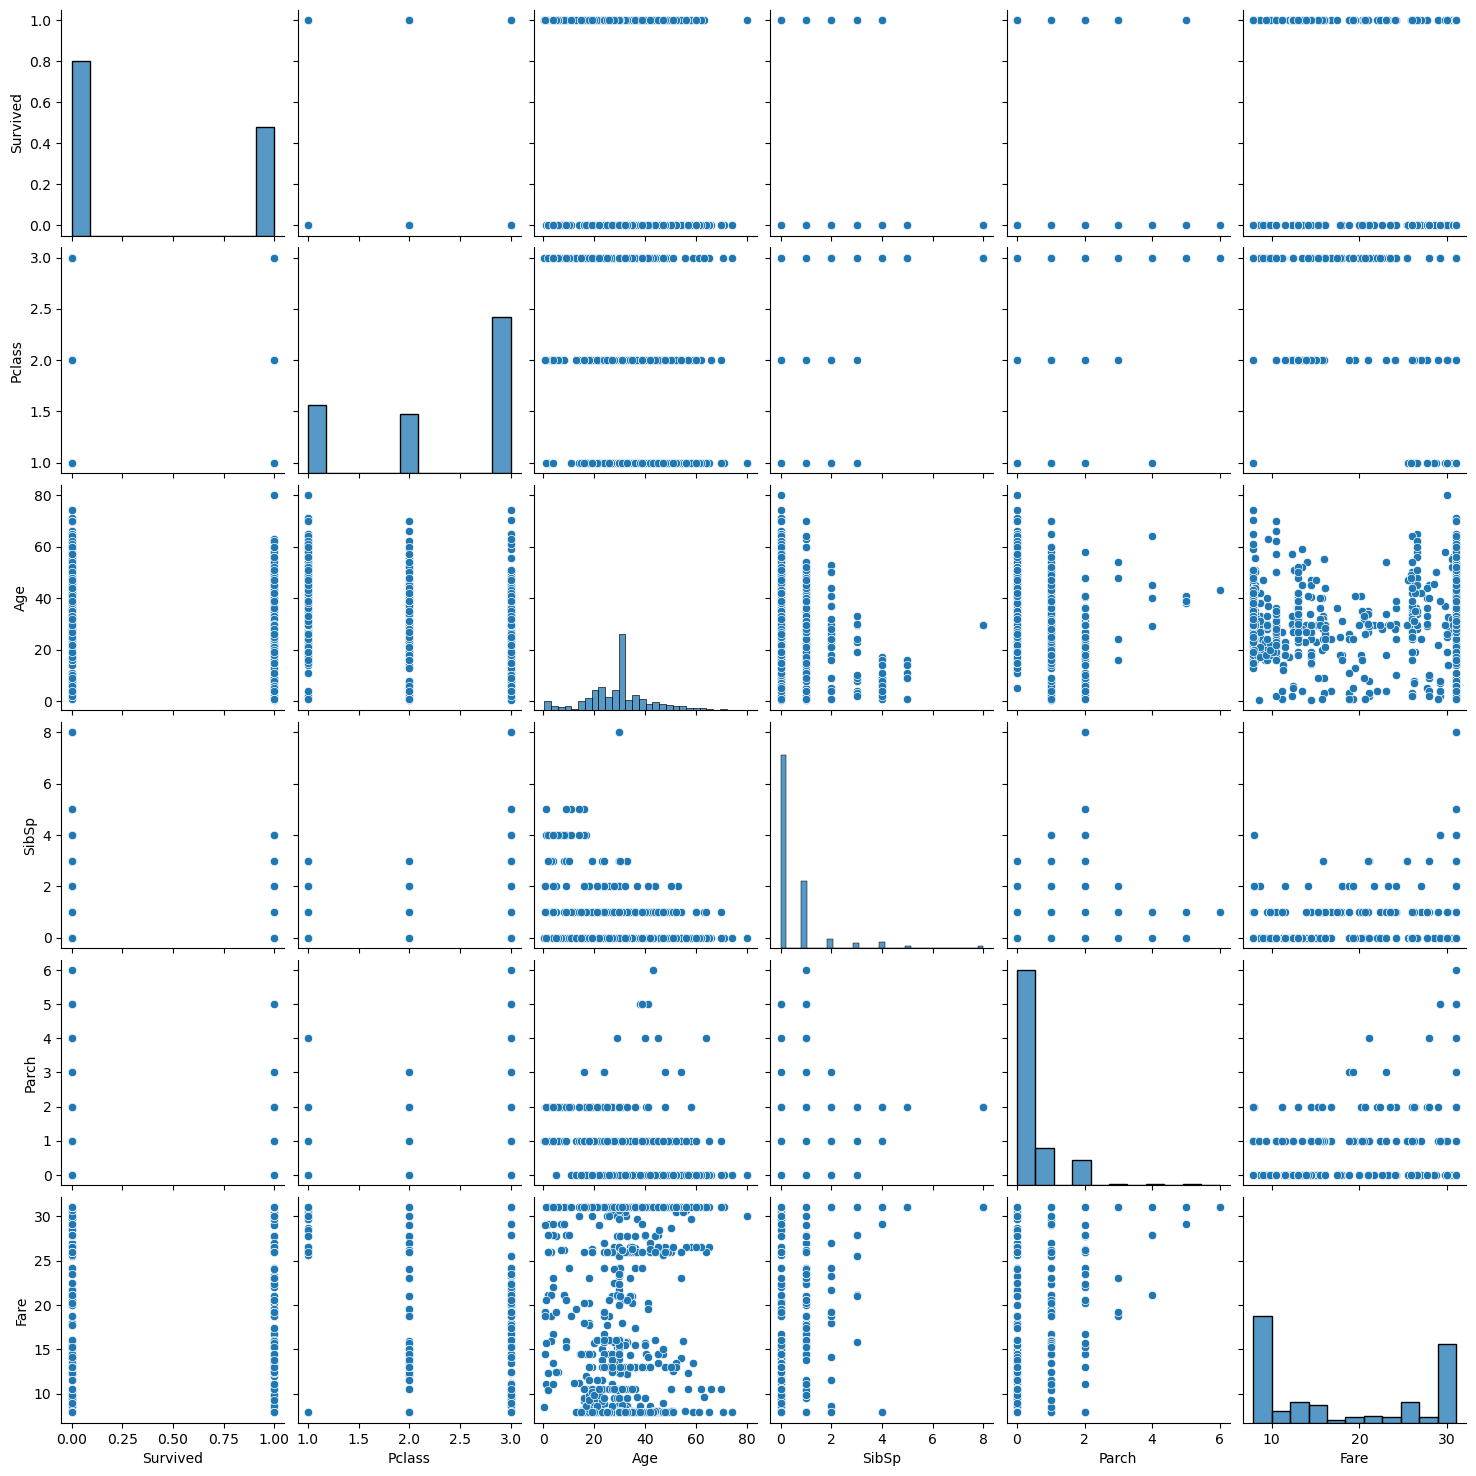

In [27]:
sns.pairplot(df_train)

<Axes: >

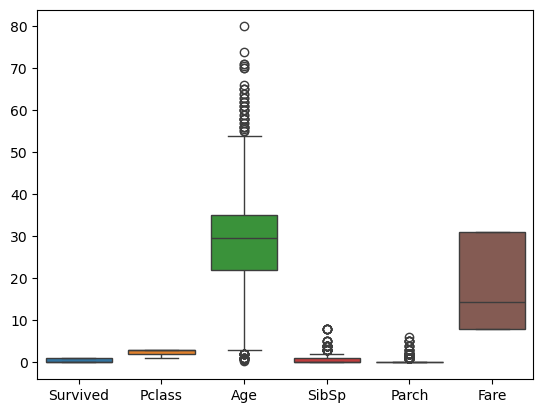

In [28]:
sns.boxplot(df_train)

<Axes: >

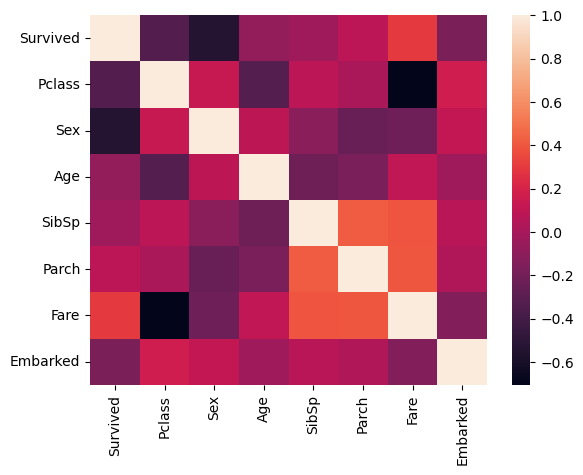

In [29]:
sns.heatmap(df_train.corr())

# model building

In [83]:
# XGboost model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    

In [32]:
X = df_train.drop('Survived', axis=1)
Y = df_train['Survived']

In [33]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.8958,2
1,1,0,38.000000,1,0,31.0000,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,31.0000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [34]:
X['Sex'] = pd.to_numeric(X['Sex'], errors='coerce')

In [35]:
X['Embarked'] = pd.to_numeric(X['Embarked'], errors='coerce')

In [36]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.8958,2
1,1,0,38.000000,1,0,31.0000,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,31.0000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [38]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [40]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [97]:
# predictions for test data(xgboost)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [99]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

In [103]:
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))

XGBoost Evaluation Metrics:
Accuracy: 0.8129251700680272
Precision: 0.7981651376146789
Recall: 0.725
F1 Score: 0.759825327510917


In [105]:
# LGboost model
import lightgbm as lgb
df_train = lgb.Dataset(X_train, label=y_train)

In [107]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [109]:
clf = lgb.train(params, df_train, 100)

[LightGBM] [Info] Number of positive: 220, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369748 -> initscore=-0.533298
[LightGBM] [Info] Start training from score -0.533298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [111]:
#Prediction for lgboost
y_pred=clf.predict(X_test)

In [113]:
predictions = [round(value) for value in y_pred]

In [117]:
print("LightGBM Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='binary'))
print("Recall:", recall_score(y_test, predictions, average='binary'))
print("F1 Score:", f1_score(y_test, predictions, average='binary'))

LightGBM Evaluation Metrics:
Accuracy: 0.5918367346938775
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# verifiying on test data set 

# data cleaning, preprocessing 

In [53]:
df_test = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\XGBM & LGBM\\Titanic_test.csv")

In [54]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [56]:
df_test.shape

(418, 11)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
df_test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [59]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [60]:
from sklearn.impute import KNNImputer

In [61]:
impute = KNNImputer(n_neighbors = 5)

In [62]:
df_test[['Age']] = impute.fit_transform(df_test[['Age']])

In [63]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [64]:
df_test = df_test.dropna()

In [65]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
df_test.iloc[:, -1]= lb.fit_transform(df_test.iloc[:,-1]).astype(str)

In [67]:
df_test.iloc[:, -6]= lb.fit_transform(df_test.iloc[:,-6]).astype(str)

In [68]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [69]:
df_test.iloc[:, :-1] = df_test.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

In [70]:
df_test.iloc[:, 2] = df_test.iloc[:, 2].apply(pd.to_numeric, errors='coerce')

In [71]:
df_test.iloc[:, :-1] = df_test.iloc[:, :-1].astype(int)

In [72]:
df_test.iloc[:, :-6] = df_test.iloc[:, :-6].astype(int)

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [74]:
df_test['Embarked'].value_counts()

Embarked
2    269
0    102
1     46
Name: count, dtype: int64

In [75]:
test_X = df_test

In [76]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,7.0,1
1,3,0,47.0,1,0,7.0,2
2,2,1,62.0,0,0,9.0,1
3,3,1,27.0,0,0,8.0,2
4,3,0,22.0,1,1,12.0,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0,2
414,1,0,39.0,0,0,108.0,0
415,3,1,38.0,0,0,7.0,2
416,3,1,30.0,0,0,8.0,2


In [77]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [ ]:
# prediction using xgboost
y_predict = model.predict(test_X)
prediction = [round(value) for value in y_pred]

In [ ]:
prediction

In [ ]:
# predictions using lgboost
y_predicts=clf.predict(test_X)

In [ ]:
predictions = [round(value) for value in y_predicts]

In [ ]:
predictions

# A brief report summarizing the comparative analysis results and practical implications.

Objective:
To build and compare the performance of Light GBM and XGBM algorithms using titanic dataset.

Methodology:
Dataset : The dataset has 12 columns and 891 rows which is considered as small dataset. It has few missing values which imputed by using KNN imputer 
and removed non related missing values. And few columns has object datatype which was later changed as int for model building.

Technique: After feature engineeging, the remaining columns are used build to LGB and XGB models as training and testing dataset 8:2 using train_test_split from scikit
learn. 

Feature: Pclass, Sex, Age, SibSp, Parch, Fare and embarked columns are used as independent features to predict Survived column, few columns are encoded and 
scaled for model building

Result: 
On this dataset LGBM accuracy is less than XBM accuracy(i.e 0.59 < 0.81).., XBM seems to perform more accurate on this dataset.

Scalability Analysis:
    
XGBM has high accuracy and robust handeling on small dataset.
LGBM has fast training but less robustness compared to XGBM and sensitive to noise.

Conclusion:

XGBM performed better compared to this particular dataset compared to LGBM due to noise handeling and robustness.